In [51]:
!python -V

Python 3.10.13


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import keras as ks
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score, classification_report
from sklearn.metrics import precision_recall_curve, auc, average_precision_score, roc_curve
import shap
import visualkeras
from PIL import ImageFont
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import keras_tuner as kt
# from category_encoders import *

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


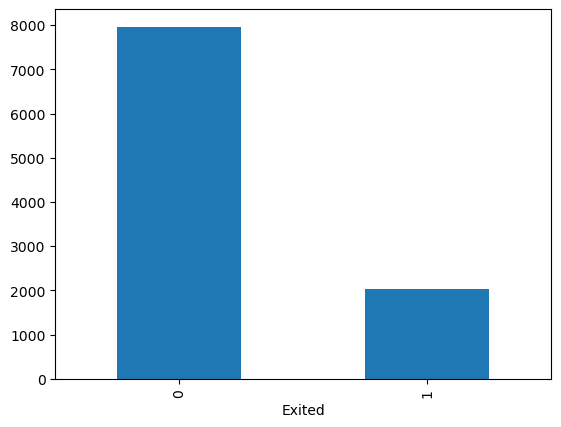

In [6]:
df.Exited.value_counts().plot(kind='bar');

In [7]:
X = df.drop(columns=['Exited', 'CustomerId', 'RowNumber', 'Surname'], axis=1)
y = df[['Exited']]

In [8]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [9]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


## LABEL ENCODING

In [10]:
# # SKLEARN LABEL ENCODER
# le = LabelEncoder()
# X['Gender'] = le.fit_transform(X['Gender'])
# le.classes_

In [11]:
# X

In [12]:
# SKLEARN ONEHOTENCODING
X.head()
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2])], remainder='passthrough')
X = pd.DataFrame(ct.fit_transform(X), columns=[x.split('__')[1] for x in ct.get_feature_names_out()])

In [13]:
X.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,0.0,0.0,1.0,0.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,0.0,1.0,1.0,0.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,0.0,0.0,1.0,0.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,1.0,0.0,0.0,1.0,0.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,0.0,1.0,1.0,0.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


## DATA SPLITTING

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle=True)

## FEATURES SCALING

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## BASELINE ANN

In [16]:
# Initializing the ANN
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=X_train.shape[1], activation='relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=y_train.shape[1], activation='sigmoid'))

# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the ANN on the Training set
history = ann.fit(X_train, y_train, batch_size = 1, epochs = 300, verbose=0, validation_data=(X_test, y_test))
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 13)                   182       
                                                                 
 dense_1 (Dense)             (1, 6)                    84        
                                                                 
 dense_2 (Dense)             (1, 1)                    7         
                                                                 
Total params: 273 (1.07 KB)
Trainable params: 273 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


63/63 [==============================] - 0s 685us/step
Accuracy:  84.6
[[1477  118]
 [ 190  215]]


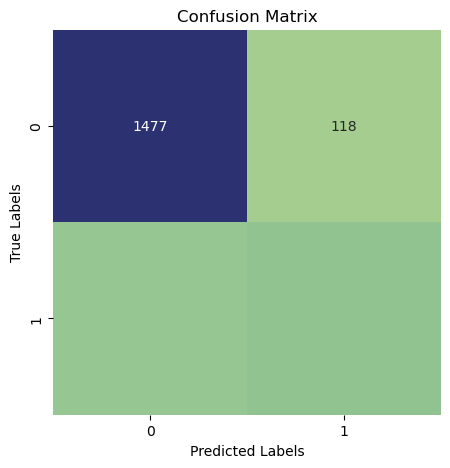

63/63 [==============================] - 0s 677us/step


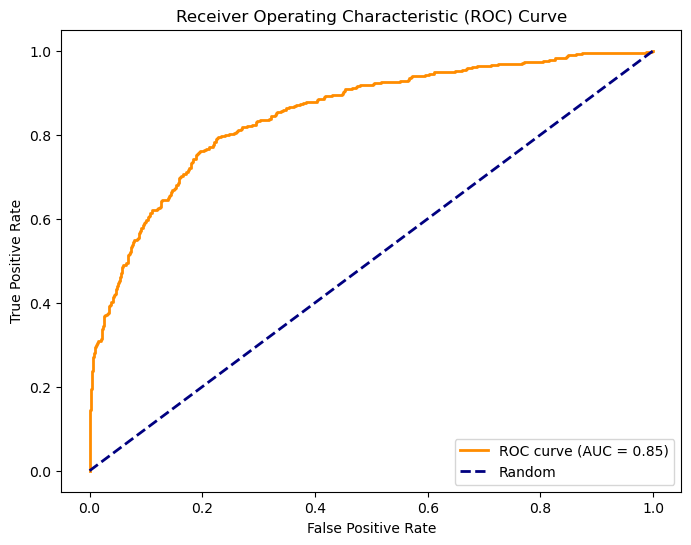

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1595
           1       0.65      0.53      0.58       405

    accuracy                           0.85      2000
   macro avg       0.77      0.73      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [17]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)

print('Accuracy: ', accuracy_score(y_test, y_pred)*100)


print(cm)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show();

fpr, tpr, thresholds = roc_curve(y_test, ann.predict(X_test))

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show();

print(classification_report(y_test, y_pred))

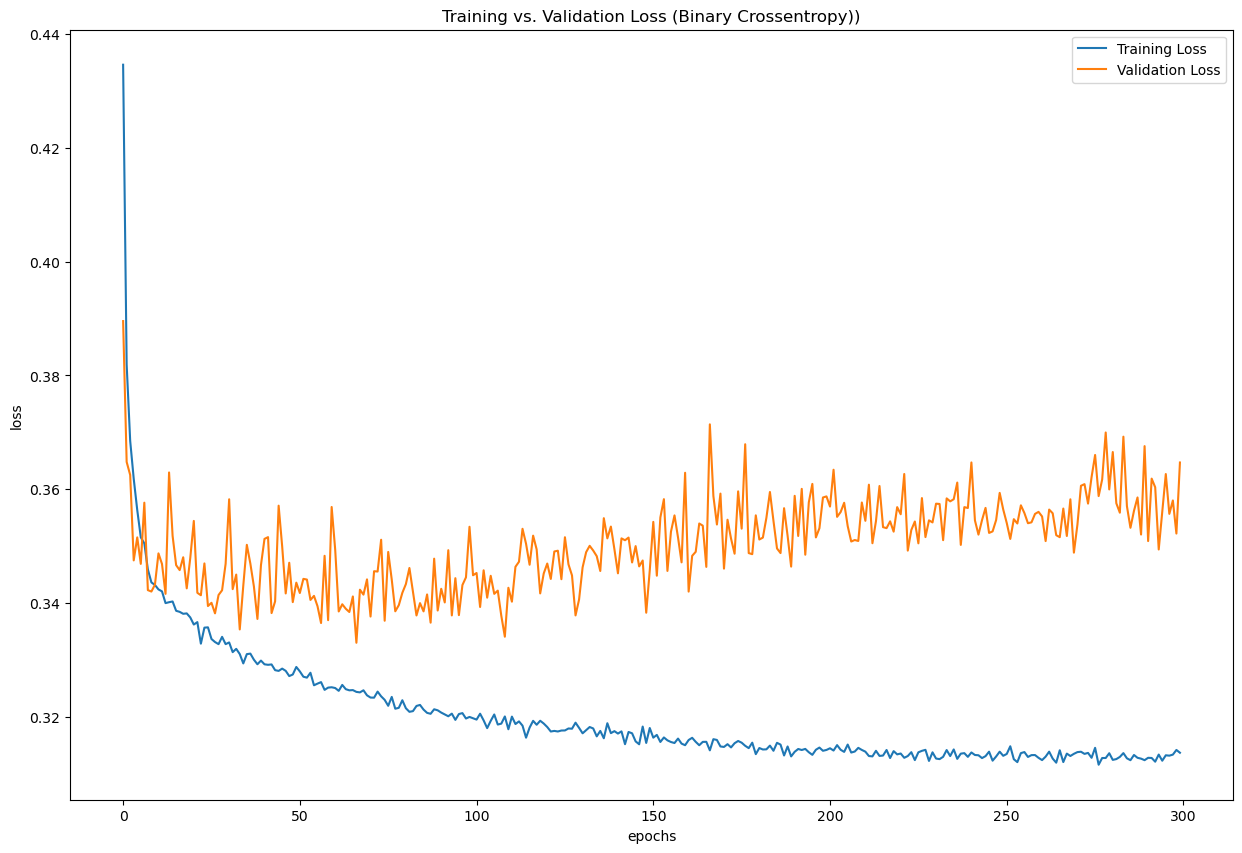

In [18]:
plt.figure(figsize=(15,10))
plt.plot(history.history[list(history.history.keys())[0]],label='Training Loss')
plt.plot(history.history[list(history.history.keys())[2]],label='Validation Loss')
plt.title(f'Training vs. Validation Loss (Binary Crossentropy))')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Max Train accuracy:  0.874875009059906  | Max Val accuracy:  0.8650000095367432


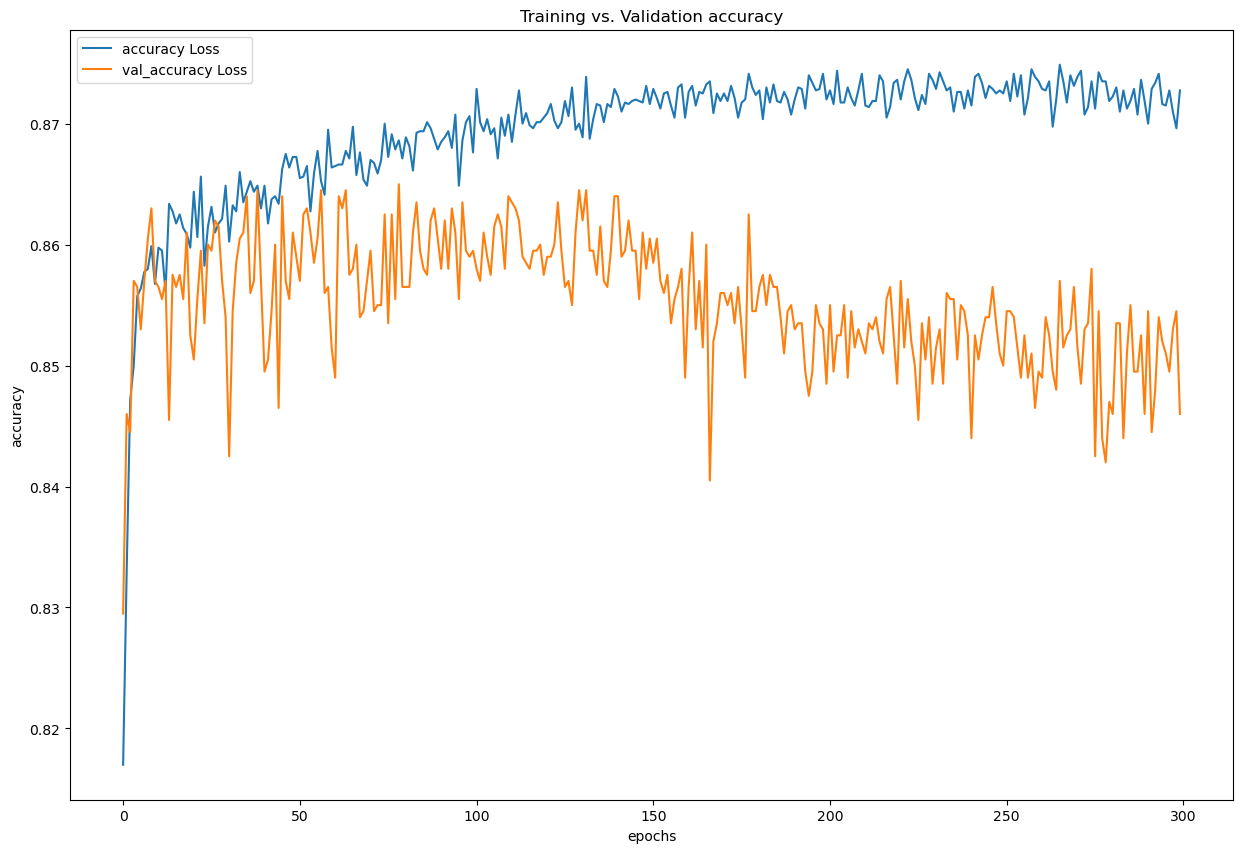

In [19]:
print(f'Max Train {list(history.history.keys())[1]}: ', max(history.history[list(history.history.keys())[1]]), f' | Max Val {list(history.history.keys())[1]}: ', max(history.history[list(history.history.keys())[-1]]))

plt.figure(figsize=(15,10))
plt.plot(history.history[list(history.history.keys())[1]],label=f'{list(history.history.keys())[1]} Loss')
plt.plot(history.history[list(history.history.keys())[-1]],label=f'{list(history.history.keys())[-1]} Loss')
plt.title(f'Training vs. Validation {list(history.history.keys())[1]}')
plt.xlabel('epochs')
plt.ylabel(f'{list(history.history.keys())[1]}')
# plt.ylim(0, 1)
plt.legend()
plt.show()

In [20]:
test_entry = pd.DataFrame(data=[[1, 0, 0, 0, 1, 600, 40, 3, 60_000, 2, 1, 1, 50_000]], columns=X.columns)
print(ann.predict(sc.transform(test_entry)) > 0.5)

1/1 [==============================] - 0s 12ms/step
[[False]]


In [21]:
# explainer = shap.Explainer(ann)
# shap_values = explainer(X_train)

# # visualize the first prediction's explanation
# shap.plots.waterfall(shap_values[0])

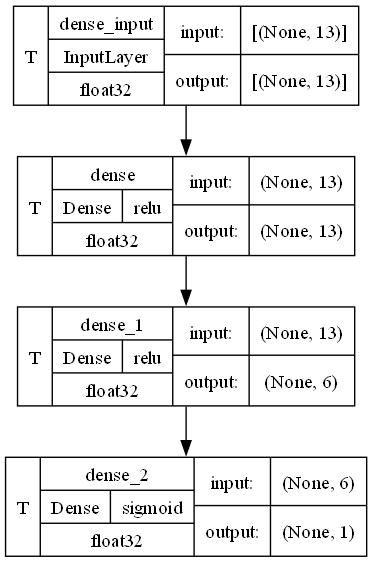

In [22]:
ks.utils.plot_model(
    ann,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=100,
    show_layer_activations=True,
    show_trainable=True,
)

<class '__main__.FontObj'>
[50, 20]


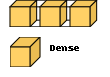

In [23]:
# visualkeras.layered_view(ann)

# ann.add(visualkeras.SpacingDummyLayer(spacing=100))

# visualkeras.layered_view(ann, spacing=0)
class FontObj:
    def __init__(self, object):
        self.object = object
        
    def getsize(*args, **kwargs):
        return [50, 20]

    def getmask(self, *args, **kwargs):
        return self.object.getmask(*args, **kwargs)
font = ImageFont.load_default()

font = FontObj(font)
print(type(font))
print(font.getsize())
visualkeras.layered_view(ann, legend=True, font=font)  # font is optional!

## DEALING WITH CLASS IMBALANCE

       proportion
Exited           
0           79.6%
1           20.4%


C:\Users\mahmo\anaconda3\envs\tf2_10\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


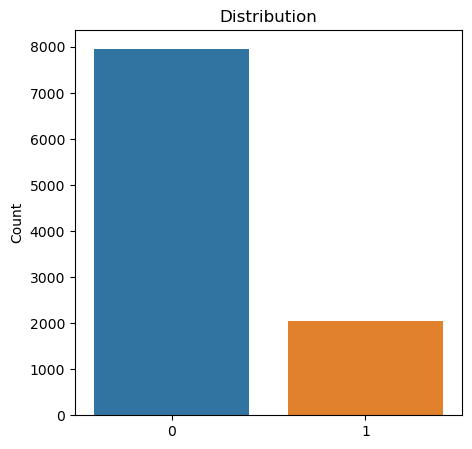

In [24]:
print(pd.DataFrame(df.Exited.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'))

plt.figure(figsize=(5, 5), dpi=100)
sns.barplot(x=df.Exited.value_counts().index.to_list(),
            y=df.Exited.value_counts().values)
plt.ylabel('Count')
plt.title('Distribution')
plt.show()

In [25]:
ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=0)

# X_resampled, y_resampled = ros.fit_resample(X, y)
X_resampled, y_resampled = rus.fit_resample(X, y)


       proportion
Exited           
0           50.0%
1           50.0%


C:\Users\mahmo\anaconda3\envs\tf2_10\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


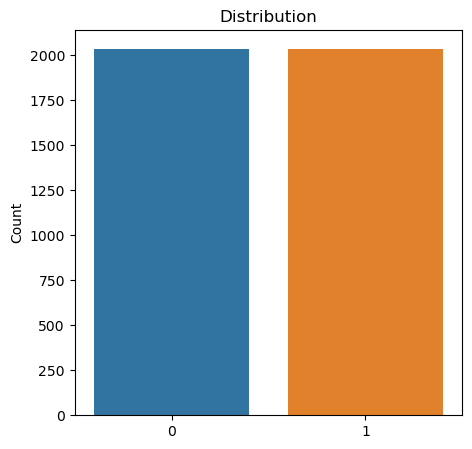

In [26]:
print(pd.DataFrame(y_resampled.Exited.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'))

plt.figure(figsize=(5, 5), dpi=100)
sns.barplot(x=y_resampled.Exited.value_counts().index.to_list(),
            y=y_resampled.Exited.value_counts().values)
plt.ylabel('Count')
plt.title('Distribution')
plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 0, shuffle=True)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
# Initializing the ANN
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=X_train.shape[1], activation='relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=y_train.shape[1], activation='sigmoid'))

# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the ANN on the Training set
history = ann.fit(X_train, y_train, batch_size = 1, epochs = 300, verbose=0, validation_data=(X_test, y_test))
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (1, 13)                   182       
                                                                 
 dense_4 (Dense)             (1, 6)                    84        
                                                                 
 dense_5 (Dense)             (1, 1)                    7         
                                                                 
Total params: 273 (1.07 KB)
Trainable params: 273 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


26/26 [==============================] - 0s 660us/step
Accuracy:  72.88343558282209
[[301 110]
 [111 293]]


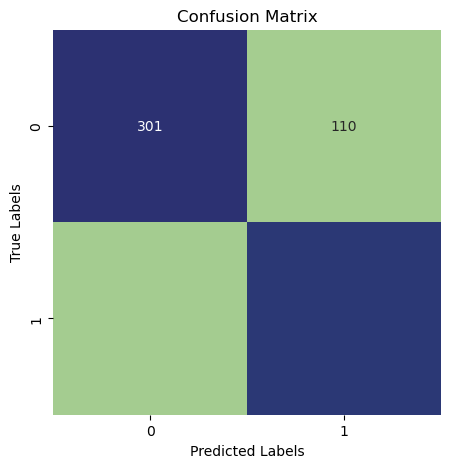

26/26 [==============================] - 0s 680us/step


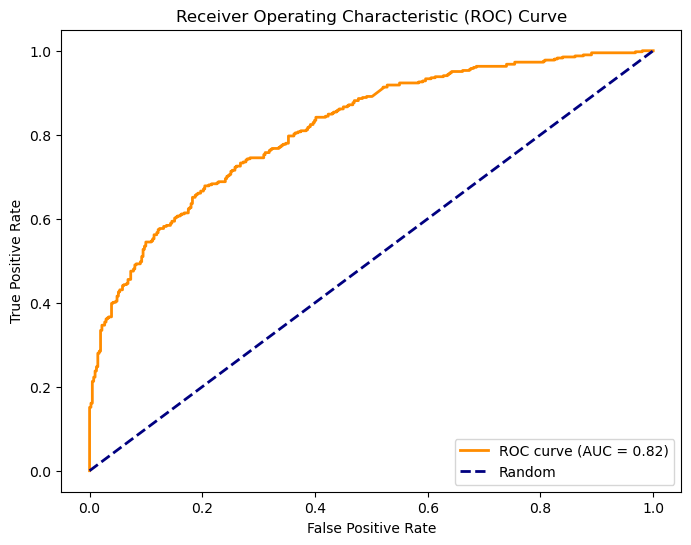

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       411
           1       0.73      0.73      0.73       404

    accuracy                           0.73       815
   macro avg       0.73      0.73      0.73       815
weighted avg       0.73      0.73      0.73       815



In [29]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)

print('Accuracy: ', accuracy_score(y_test, y_pred)*100)


print(cm)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show();

fpr, tpr, thresholds = roc_curve(y_test, ann.predict(X_test))

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show();

print(classification_report(y_test, y_pred))

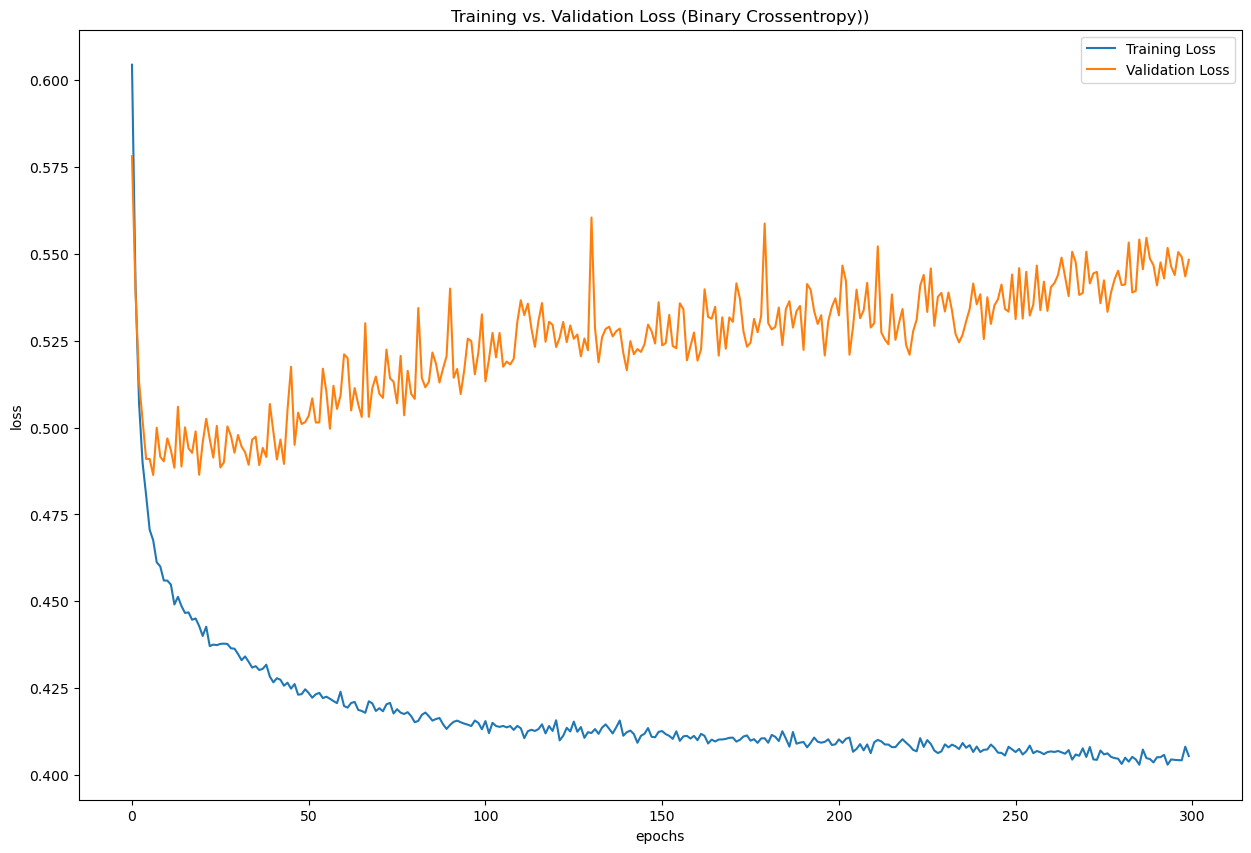

In [30]:
plt.figure(figsize=(15,10))
plt.plot(history.history[list(history.history.keys())[0]],label='Training Loss')
plt.plot(history.history[list(history.history.keys())[2]],label='Validation Loss')
plt.title(f'Training vs. Validation Loss (Binary Crossentropy))')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Max Train accuracy:  0.8220313191413879  | Max Val accuracy:  0.7521472573280334


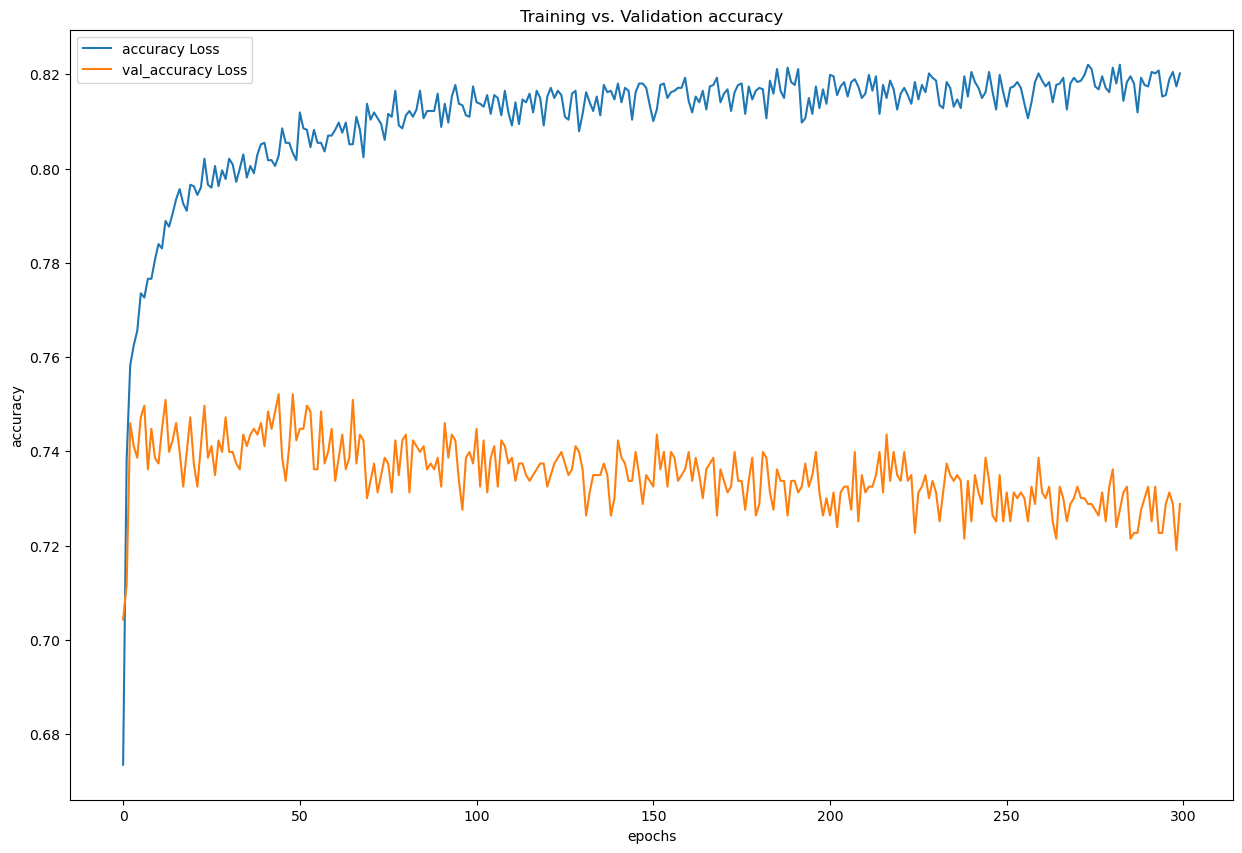

In [31]:
print(f'Max Train {list(history.history.keys())[1]}: ', max(history.history[list(history.history.keys())[1]]), f' | Max Val {list(history.history.keys())[1]}: ', max(history.history[list(history.history.keys())[-1]]))

plt.figure(figsize=(15,10))
plt.plot(history.history[list(history.history.keys())[1]],label=f'{list(history.history.keys())[1]} Loss')
plt.plot(history.history[list(history.history.keys())[-1]],label=f'{list(history.history.keys())[-1]} Loss')
plt.title(f'Training vs. Validation {list(history.history.keys())[1]}')
plt.xlabel('epochs')
plt.ylabel(f'{list(history.history.keys())[1]}')
# plt.ylim(0, 1)
plt.legend()
plt.show()

## RANDOM SEARCH ALGO

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle=True)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
#Hyper Parameters for classification
#Hyper Parameters
# optim = ['Adam','AdaDelta']
optim = ['Adam','Adamax','Ftrl','Nadam','SGD','AdaDelta']
loss = ['binary_crossentropy','MSE']
# loss = ['binary_crossentropy','MSE']
metrics = ['accuracy']
# metrics = ['accuracy']
#activation = ['linear','relu','sigmoid','tanh']
#activation_HL = ['linear','relu','sigmoid','tanh']
activation = ['relu','tanh','elu']
activation_HL = ['relu','tanh']
activation_out = ['sigmoid','tanh','swish']
epochs = 200

In [34]:
def build_model(hp):
    model = tf.keras.Sequential()
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units1 = hp.Int('units1', min_value=5, max_value=100, step=10)
    hp_units2 = hp.Int('units2', min_value=5, max_value=100, step=10)
    hp_units3 = hp.Int('units3', min_value=5, max_value=100, step=10)
    
    hp_optimizer = hp.Choice('optimizer', optim)
    hp_loss = hp.Choice('loss', loss)
    hp_metric = hp.Choice('metrics', metrics)

    hp_activation_input = hp.Choice('activation_in', activation)
    hp_activation_hl = hp.Choice('activation_hl', activation_HL)
    hp_activation_output = hp.Choice('activation_out', activation_out)
    
    
    # INPUT LAYER
    model.add(tf.keras.layers.Dense(units=X_train.shape[1], activation=hp_activation_input))
    
    # HIDDEN LAYERS
    model.add(tf.keras.layers.Dense(units=hp_units1,activation=hp_activation_hl, ))
    model.add(tf.keras.layers.Dense(units=hp_units2,activation=hp_activation_hl, ))
    model.add(tf.keras.layers.Dense(units=hp_units3,activation=hp_activation_hl, ))

    # OUTPUT LAYER
    model.add(tf.keras.layers.Dense(units=y_train.shape[1], activation=hp_activation_output))

    model.compile(
        optimizer=hp_optimizer,
        loss=hp_loss,
        metrics=hp_metric
    )

    return model

In [35]:
build_model(kt.HyperParameters())

In [36]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="tuner_params",
)

In [37]:
tuner.search_space_summary()

Search space summary
Default search space size: 9
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 100, 'step': 10, 'sampling': 'linear'}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 100, 'step': 10, 'sampling': 'linear'}
units3 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 100, 'step': 10, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'Adam', 'conditions': [], 'values': ['Adam', 'Adamax', 'Ftrl', 'Nadam', 'SGD', 'AdaDelta'], 'ordered': False}
loss (Choice)
{'default': 'binary_crossentropy', 'conditions': [], 'values': ['binary_crossentropy', 'MSE'], 'ordered': False}
metrics (Choice)
{'default': 'accuracy', 'conditions': [], 'values': ['accuracy'], 'ordered': False}
activation_in (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'elu'], 'ordered': False}
activation_hl (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
activatio

In [38]:
# tuner.search(Train_X_std, Train_Y, epochs=2, validation_split=0.2)
tuner.search(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

Trial 10 Complete [00h 02m 15s]
val_accuracy: 0.863999992609024

Best val_accuracy So Far: 0.8675000071525574
Total elapsed time: 00h 21m 27s


In [39]:
tuner.results_summary()

Results summary
Results in my_dir\tuner_params
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 07 summary
Hyperparameters:
units1: 95
units2: 5
units3: 55
optimizer: Nadam
loss: binary_crossentropy
metrics: accuracy
activation_in: tanh
activation_hl: tanh
activation_out: swish
Score: 0.8675000071525574

Trial 08 summary
Hyperparameters:
units1: 35
units2: 35
units3: 45
optimizer: Adam
loss: binary_crossentropy
metrics: accuracy
activation_in: elu
activation_hl: relu
activation_out: swish
Score: 0.8675000071525574

Trial 06 summary
Hyperparameters:
units1: 5
units2: 85
units3: 85
optimizer: Adamax
loss: MSE
metrics: accuracy
activation_in: elu
activation_hl: tanh
activation_out: tanh
Score: 0.867000013589859

Trial 01 summary
Hyperparameters:
units1: 25
units2: 55
units3: 45
optimizer: Adam
loss: MSE
metrics: accuracy
activation_in: tanh
activation_hl: relu
activation_out: tanh
Score: 0.8659999966621399

Trial 03 summary
Hyperparameters:
units1: 65
units2: 

In [40]:
# Get the top 2 hyperparameters.
best_hps = tuner.get_best_hyperparameters(5)
print(best_hps)
# Build the model with the best hp.
model = build_model(best_hps[0])
# Fit with the entire dataset.
x_all = np.concatenate((X_train, X_test))
y_all = np.concatenate((y_train, y_test))
history = model.fit(x=x_all, y=y_all, epochs=epochs)

[<keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x000001DBE75632B0>, <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x000001DBEB3736D0>, <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x000001DBE7714310>, <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x000001DBE28FC1F0>, <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x000001DBDED2BEB0>]
Epoch 1/200
313/313 [==============================] - 2s 1ms/step - loss: 0.5674 - accuracy: 0.7997
Epoch 2/200
313/313 [==============================] - 0s 1ms/step - loss: 0.4626 - accuracy: 0.8008
Epoch 3/200
313/313 [==============================] - 0s 1ms/step - loss: 0.4521 - accuracy: 0.8013
Epoch 4/200
313/313 [==============================] - 0s 1ms/step - loss: 0.4467 - accuracy: 0.8136
Epoch 5/200
313/313 [==============================] - 0s 1ms/step - loss: 0.435

63/63 [==============================] - 0s 871us/step
Accuracy:  86.5
[[1479  116]
 [ 154  251]]


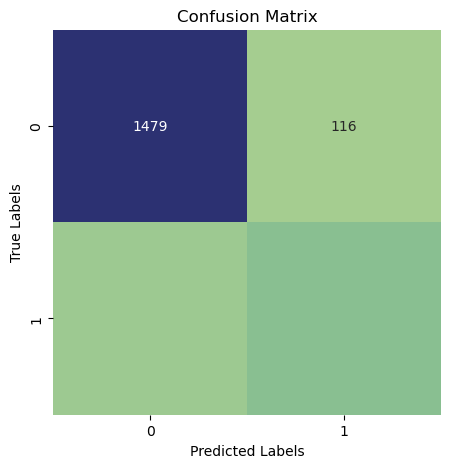

63/63 [==============================] - 0s 694us/step


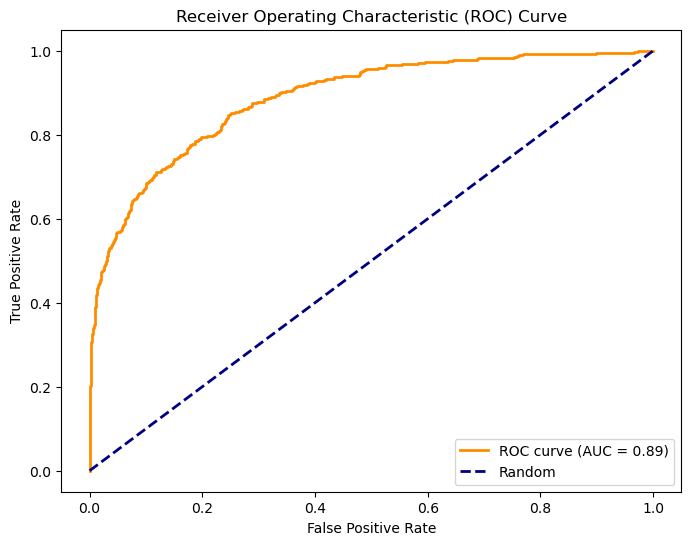

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1595
           1       0.68      0.62      0.65       405

    accuracy                           0.86      2000
   macro avg       0.79      0.77      0.78      2000
weighted avg       0.86      0.86      0.86      2000



In [41]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)

print('Accuracy: ', accuracy_score(y_test, y_pred)*100)


print(cm)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show();

fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show();

print(classification_report(y_test, y_pred))

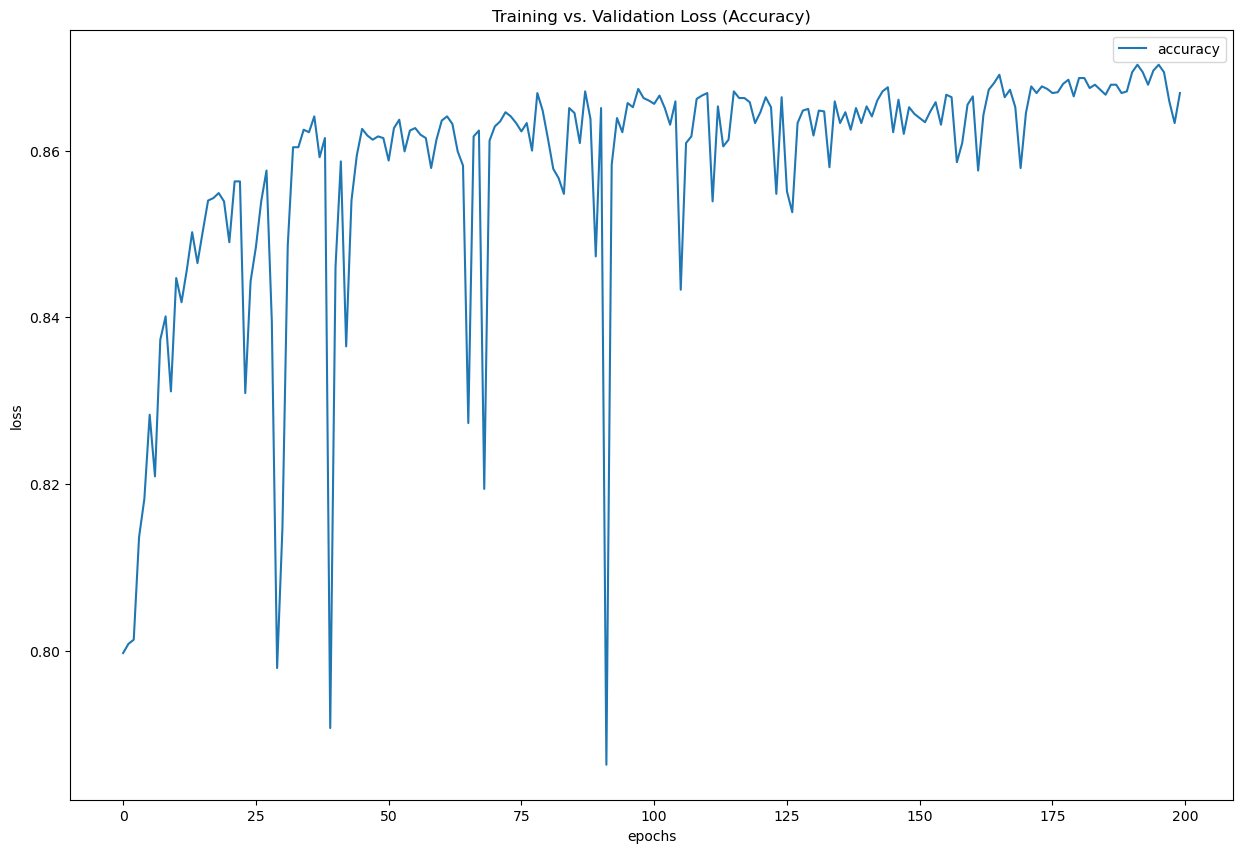

In [42]:
plt.figure(figsize=(15,10))
# plt.plot(history.history[list(history.history.keys())[0]],label=list(history.history.keys())[0])
plt.plot(history.history[list(history.history.keys())[1]],label=list(history.history.keys())[1])
plt.title(f'Training vs. Validation Loss (Accuracy)')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<class '__main__.FontObj'>
[50, 20]


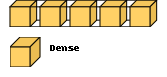

In [43]:
visualkeras.layered_view(model)

# ann.add(visualkeras.SpacingDummyLayer(spacing=100))

# visualkeras.layered_view(ann, spacing=0)
class FontObj:
    def __init__(self, object):
        self.object = object
        
    def getsize(*args, **kwargs):
        return [50, 20]

    def getmask(self, *args, **kwargs):
        return self.object.getmask(*args, **kwargs)
font = ImageFont.load_default()

font = FontObj(font)
print(type(font))
print(font.getsize())
visualkeras.layered_view(model, legend=True, font=font)  # font is optional!

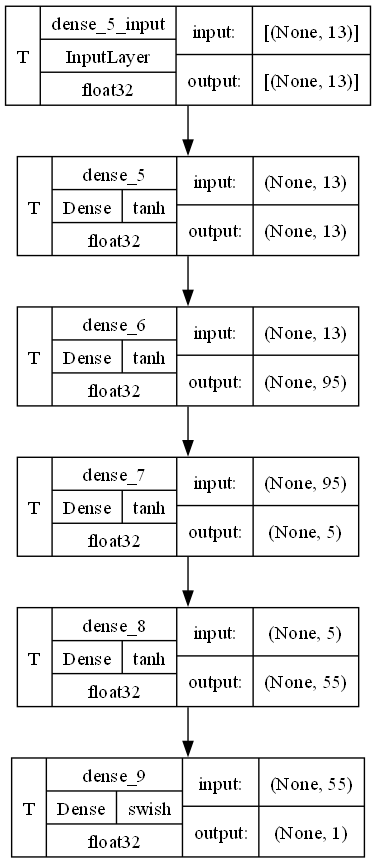

In [44]:
ks.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=100,
    show_layer_activations=True,
    show_trainable=True,
)

PermutationExplainer explainer: 8001it [09:56, 13.26it/s]                                                              


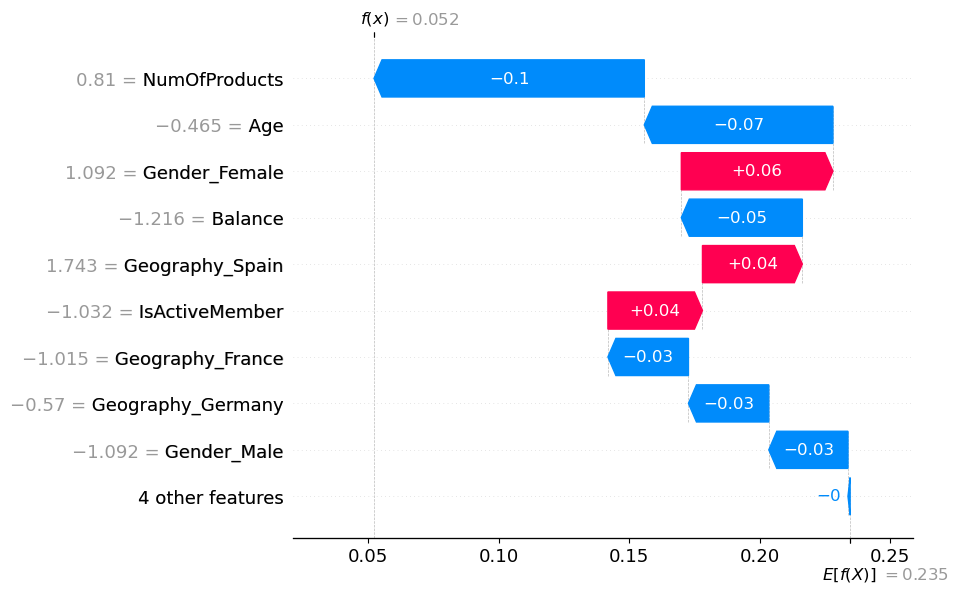

In [45]:
explainer = shap.Explainer(model, X_train, feature_names=X.columns.tolist())
shap_values = explainer(X_train)

# # visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

63/63 [==============================] - 0s 750us/step


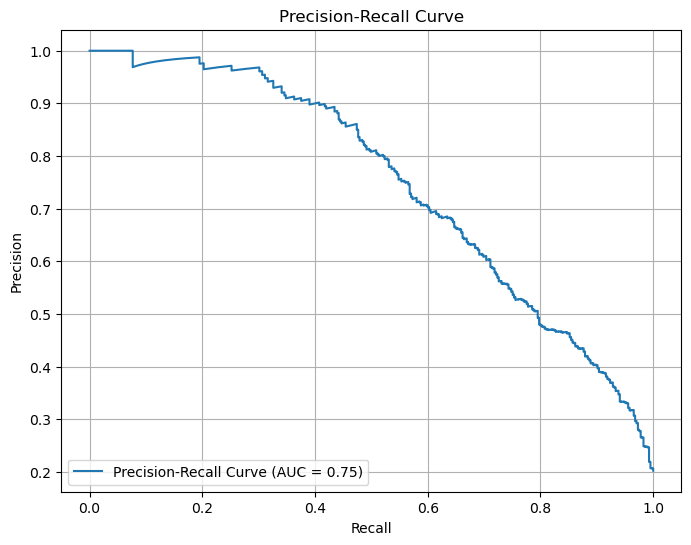

In [46]:
# Compute precision-recall curve and area under the curve (AUC)

# Predict probabilities for the positive class
y_scores = model.predict(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
area_under_curve = auc(recall, precision)
average_precision = average_precision_score(y_test, y_scores)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {area_under_curve:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()